# Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np

# Recuperação dos dados

In [49]:
train = pd.read_csv("data/train.csv")
teste = pd.read_csv("data/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# Função para transformar variável nominal em número
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

train['Sexo_binario'] = train['Sex'].map(transformar_sexo)
teste['Sexo_binario'] = teste['Sex'].map(transformar_sexo)

# Desenvolvimento e teste de soluções

In [24]:
# Importação do classificador
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

In [25]:
# Variáveis que serão utilizadas
variaveis = ['Sexo_binario', 'Age']

In [28]:
# Recuperação apenas dos dados que serão utilizados
X = train[variaveis]
y = train['Survived']

In [29]:
# Preenchimento de dados nulos
X = X.fillna(-1)

### Validação Cruzada

In [31]:
# Execução real com validação cruzada
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []
for linhas_treino, linhas_valid in kf.split(X):
    print("Treino: ", linhas_treino.shape[0])
    print("Validação: ", linhas_valid.shape[0])

    # Separa o X e y de treinamento e validação
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid= y.iloc[linhas_treino], y.iloc[linhas_valid]

    # Treina o modelo com os dados destacados para treino na execução
    modelo_floresta = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    modelo_floresta.fit(X_treino,y_treino)

    p = modelo_floresta.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()

Treino:  445
Validação:  446
Acc:  0.7511210762331838

Treino:  446
Validação:  445
Acc:  0.7617977528089888

Treino:  445
Validação:  446
Acc:  0.7533632286995515

Treino:  446
Validação:  445
Acc:  0.7595505617977528

Treino:  445
Validação:  446
Acc:  0.7690582959641256

Treino:  446
Validação:  445
Acc:  0.7573033707865169

Treino:  445
Validação:  446
Acc:  0.7399103139013453

Treino:  446
Validação:  445
Acc:  0.7595505617977528

Treino:  445
Validação:  446
Acc:  0.7354260089686099

Treino:  446
Validação:  445
Acc:  0.797752808988764

Treino:  445
Validação:  446
Acc:  0.7690582959641256

Treino:  446
Validação:  445
Acc:  0.7640449438202247

Treino:  445
Validação:  446
Acc:  0.7757847533632287

Treino:  446
Validação:  445
Acc:  0.7573033707865169

Treino:  445
Validação:  446
Acc:  0.7556053811659192

Treino:  446
Validação:  445
Acc:  0.7640449438202247

Treino:  445
Validação:  446
Acc:  0.7443946188340808

Treino:  446
Validação:  445
Acc:  0.7595505617977528

Treino:  44

In [32]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [34]:
# Média das previsões
np.mean(resultados)

0.759601451100922

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

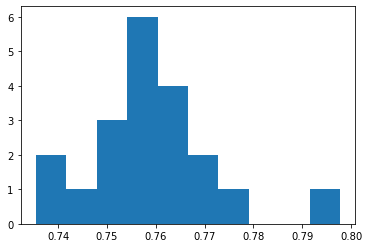

In [33]:
# Plota o histograma de resultados
pylab.hist(resultados)

### Treino com novas variáveis

In [44]:
# Variáveis que serão utilizadas
variaveis = ['Sexo_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [36]:
# Recuperação apenas dos dados que serão utilizados
X = train[variaveis].fillna(-1)
y = train['Survived']

In [37]:
# Execução real com validação cruzada
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []
for linhas_treino, linhas_valid in kf.split(X):
    print("Treino: ", linhas_treino.shape[0])
    print("Validação: ", linhas_valid.shape[0])

    # Separa o X e y de treinamento e validação
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid= y.iloc[linhas_treino], y.iloc[linhas_valid]

    # Treina o modelo com os dados destacados para treino na execução
    modelo_floresta = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    modelo_floresta.fit(X_treino,y_treino)

    p = modelo_floresta.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()

Treino:  445
Validação:  446
Acc:  0.7869955156950673

Treino:  446
Validação:  445
Acc:  0.7797752808988764

Treino:  445
Validação:  446
Acc:  0.827354260089686

Treino:  446
Validação:  445
Acc:  0.8179775280898877

Treino:  445
Validação:  446
Acc:  0.7847533632286996

Treino:  446
Validação:  445
Acc:  0.7842696629213484

Treino:  445
Validação:  446
Acc:  0.8161434977578476

Treino:  446
Validação:  445
Acc:  0.7842696629213484

Treino:  445
Validação:  446
Acc:  0.8004484304932735

Treino:  446
Validação:  445
Acc:  0.8

Treino:  445
Validação:  446
Acc:  0.8183856502242153

Treino:  446
Validação:  445
Acc:  0.802247191011236

Treino:  445
Validação:  446
Acc:  0.8116591928251121

Treino:  446
Validação:  445
Acc:  0.8067415730337079

Treino:  445
Validação:  446
Acc:  0.820627802690583

Treino:  446
Validação:  445
Acc:  0.7887640449438202

Treino:  445
Validação:  446
Acc:  0.8385650224215246

Treino:  446
Validação:  445
Acc:  0.8044943820224719

Treino:  445
Validação:  446

Média dos resultados:  0.8041457147175896


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

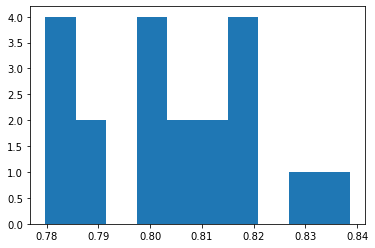

In [41]:
# Média das previsões
print("Média dos resultados: ", np.mean(resultados))
# Plota o histograma de resultados
pylab.hist(resultados)

### Retreina o modelo utilizando todos os registros e as variáveis selecionadas

In [53]:
teste[variaveis].head()

,Sexo_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [55]:
# Treina o modelo com os dados destacados para treino na execução
modelo_floresta = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
modelo_floresta.fit(X,y)

p = modelo_floresta.predict(teste[variaveis].fillna(-1))

In [56]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Criar submission para o Kaggle

In [58]:
sub = pd.Series(p, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [59]:
sub.to_csv("output/RandomForestModelV4.csv", header=True)